### 对比4个模型的预测结果

In [1]:
import torch
import numpy as np
import scipy.io as scio
# ALSSVM
y_true1 = torch.tensor(scio.loadmat('result/ALSSVM_y_true.mat')['y_true_test_nox'], dtype=torch.float32)
y_pred1 = torch.tensor(scio.loadmat('result/ALSSVM_y_pred.mat')['y_pred_test_nox'], dtype=torch.float32)
# offline
y_true2 = torch.load("result/LSTM_base_y_true.pt")
y_pred2 = torch.load("result/LSTM_base_y_pred.pt")   
# online
y_true3 = torch.load("result/LSTM_replay_naive_s1000_y_true.pt")
y_pred3 = torch.load("result/LSTM_replay_naive_s1000_y_pred.pt")     
# online + MAS
y_true4 = torch.load("result/LSTM_replay_MAS_y_1_true.pt")
y_pred4 = torch.load("result/LSTM_replay_MAS_y_1_pred.pt") 
print(y_true1.shape,y_true2.shape,y_true3.shape,y_true3.shape)
assert (y_true1==y_true2).all()

torch.Size([45800, 15]) torch.Size([45800, 15]) torch.Size([45800, 15]) torch.Size([45800, 15])


### 绘制时域统计平均，时域长度为8000

In [5]:
def printmape(y_true1, y_pred1):
    mape = ((y_true1 - y_pred1).abs())
    lindex_list = [6000,7950,46000]
    h = 15
    mape_window_mean = np.zeros((10, 1))
    mape_window_std = np.zeros((10, 1))
    mape_window_mean[0] =  mape[6000:7950,0].mean()
    mape_window_std[0] =  mape[6000:7950,0].std()
    
    mape_window_mean[1] =  mape[6000:7950,0:6].mean()
    mape_window_std[1] =  mape[6000:7950,0:6].std()
    
  #  mape_window_mean[2] =  mape[0:7950,6].mean()
  # mape_window_std[2] =  mape[0:7950,6].std()
    
    mape_window_mean[3] =  mape[6000:7950,7:15].mean()
    mape_window_std[3] =  mape[6000:7950,7:15].std()

    mape_window_mean[4] =  mape[6000:7950,0:15].mean()
    mape_window_std[4] =  mape[6000:7950,0:15].std()

    mape_window_mean[5] =  mape[7950:,0].mean()
    mape_window_std[5] =  mape[7950:,0].std()
    
    mape_window_mean[6] =  mape[7950:,0:6].mean()
    mape_window_std[6] =  mape[7950:,0:6].std()
    
    mape_window_mean[7] =  mape[7950:,6].mean()
    mape_window_std[7] =  mape[7950:,6].std()
    
    mape_window_mean[8] =  mape[7950:,7:15].mean()
    mape_window_std[8] =  mape[7950:,7:15].std()

    mape_window_mean[9] =  mape[7950:,0:15].mean()
    mape_window_std[9] =  mape[7950:,0:15].std()
    
    print(mape_window_mean.T)
    print(mape_window_std.T)

np.set_printoptions (precision=2, suppress=True)
printmape(y_true1, y_pred1)

[[ 5.38 16.45  0.   38.74 29.19  5.46 16.67 29.72 39.9  29.93]]
[[ 4.22 15.98  0.   31.79 28.14  4.7  17.37 26.04 35.87 31.23]]


In [888]:
printmape(y_true2, y_pred2)

[[ 1.93  6.39  0.   27.61 18.33  2.31  7.54 18.23 30.4  20.44]]
[[ 2.38  8.36  0.   22.84 20.59  2.29  9.08 16.28 28.65 24.66]]


In [889]:
printmape(y_true3, y_pred3)

[[ 1.93  6.39  0.   27.61 18.33  1.22  5.62 15.86 31.77 20.25]]
[[ 2.38  8.36  0.   22.84 20.59  1.44  7.7  14.97 30.24 26.16]]


In [890]:
printmape(y_true4, y_pred4)

[[ 1.93  6.39  0.   27.61 18.33  1.22  5.49 15.38 30.56 19.52]]
[[ 2.38  8.36  0.   22.84 20.59  1.48  7.52 14.6  29.34 25.31]]


In [ ]:
预测步数1, mape_mean:[0.34 0.67 0.89 0.81 0.68 1.1 ] 0.81594765
预测步数1, mape_std:[0.36 0.79 0.97 0.88 0.92 1.05] 0.9287987
预测步数7, mape_mean:[2.82 5.18 6.7  5.73 5.53 8.14] 6.149973
预测步数7, mape_std:[2.59 4.3  6.29 5.12 5.36 5.79] 5.4848094
预测步数14, mape_mean:[ 5.65  9.97 13.01 10.33 11.03 14.9 ] 11.67871
预测步数14, mape_std:[ 5.17  7.55 13.19  8.5  10.12  9.91] 10.200006

In [ ]:
预测步数1, mape_mean:[0.34 0.5  0.41 0.43 0.35 0.32] 0.40758777
预测步数1, mape_std:[0.36 0.5  0.43 0.55 0.52 0.26] 0.47749463
预测步数7, mape_mean:[2.82 5.19 5.32 5.77 4.93 4.91] 5.2453876
预测步数7, mape_std:[2.59 4.37 4.8  6.3  4.58 3.59] 4.8825073
预测步数14, mape_mean:[ 5.65 10.91 13.14 14.17 13.23 13.54] 12.976846
预测步数14, mape_std:[ 5.17  9.49 11.74 13.58 12.11  9.63] 11.5688505

In [ ]:
预测步数1, mape_mean:[0.34 0.48 0.45 0.44 0.35 0.31] 0.4105825
预测步数1, mape_std:[0.36 0.52 0.56 0.49 0.46 0.26] 0.48173895
预测步数7, mape_mean:[2.82 4.77 5.11 5.65 4.98 4.78] 5.075299
预测步数7, mape_std:[2.59 4.37 4.51 5.44 4.55 3.77] 4.613349
预测步数14, mape_mean:[ 5.65 10.33 12.2  13.88 12.72 13.08] 12.415174
预测步数14, mape_std:[ 5.17  9.81 11.11 12.06 10.96 10.  ] 10.931248

### 绘制误差随时间变化曲线 H=1；H=7

torch.Size([45800, 15]) torch.Size([45800, 15])
(305, 15)
torch.Size([45800, 15]) torch.Size([45800, 15])
(305, 15)
torch.Size([45800, 15]) torch.Size([45800, 15])
(305, 15)
torch.Size([45800, 15]) torch.Size([45800, 15])
(305, 15)


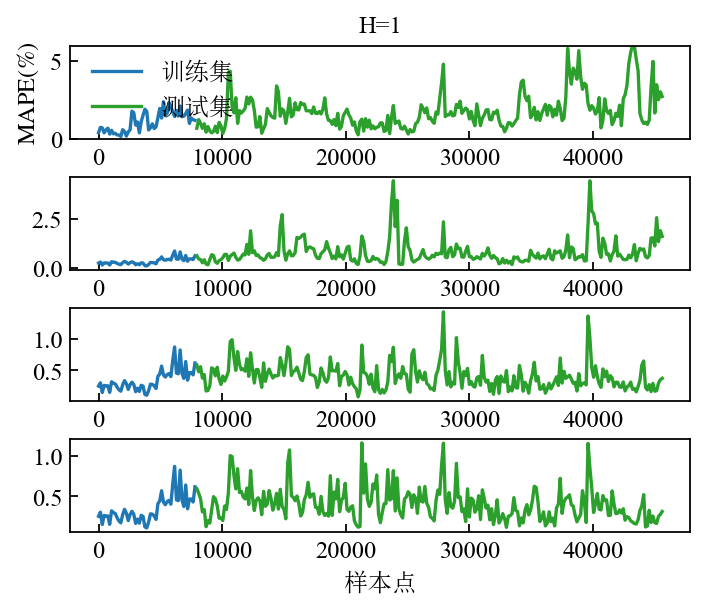

In [6]:
def get_error_window(y_pred1, y_true1):
    def mape(y_pred, y_true):
        loss = ((y_pred - y_true).abs() / (y_true.abs() + 1e-8))*100
        return loss

    def mae(y_pred, y_true):
        loss = (y_pred - y_true).abs()
        return loss

    mape = mape(y_pred1, y_true1)
    mae = mae(y_pred1, y_true1)
    print(mape.shape, mae.shape)
    # 绘制MAE，MAPE多步随时间变化情况,采用窗口求统计平均
    window_len = 150
    s, h = mape.shape
    mape_window = np.zeros((s//window_len, h))
    for i in range(s//window_len):
        mape_window[i, :] = mape[i*window_len:i*window_len+window_len,:].mean(0)
    print(mape_window.shape)
    return mape_window

mape_window1 = get_error_window(y_pred1, y_true1)
mape_window2 = get_error_window(y_pred2, y_true2)
mape_window3 = get_error_window(y_pred3, y_true3)
mape_window4 = get_error_window(y_pred4, y_true4)


# 绘图
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.ticker as ticker

# create figure
config = {
"font.family":'serif',  
"font.size": 11,    
"mathtext.fontset":'stix',
"xtick.direction":"in",
"ytick.direction":"in",
"font.family":"times new roman",
}
window_len = 150
# 画板设置
train_len = 5962
val_len = 1988
font_size = 11
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
fig = plt.figure(dpi=160, figsize=(6/1.2, 5/1.2))
# 绘图曲线
train_st = 0
train_ed = train_st + train_len
val_st = train_ed
val_ed = train_ed + val_len
test_st = val_ed
test_ed = y_pred1.shape[0]

train_st, train_ed, val_st, val_ed, test_st, test_ed = [int(i/window_len) for i in [train_st, train_ed, val_st, val_ed, test_st, test_ed]]

h = 0 # 预测步数
ax = fig.add_subplot(411)
ax.plot(np.arange(train_st,val_ed)*window_len, mape_window1[train_st:val_ed,h], color=color_list[1], linestyle='-')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window1[test_st:test_ed,h], color=color_list[3], linestyle='-')
ax.set_ylim([0,6])
ax.set_title("H=1",fontsize=font_size)
ax.set_ylabel('$\mathrm{MAPE(\%)}$', fontfamily="SimSun", fontsize=font_size)
legend_font = {"family":"SimSun", "size":11}
plt.legend(['训练集','测试集'],frameon=False, prop=legend_font)  # ncol=3,  bbox_to_anchor=(0.98, 1.05)

ax = fig.add_subplot(412)
ax.plot(np.arange(train_st,val_ed)*window_len, mape_window2[train_st:val_ed,h], color=color_list[1], linestyle='-')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window2[test_st:test_ed,h], color=color_list[3], linestyle='-')
# ax.set_ylabel('$\mathrm{MAPE(\%)}$', fontfamily="SimSun", fontsize=font_size)
# ax.set_ylim([0,40])
# ax.set_title("H=7",fontsize=font_size)

ax = fig.add_subplot(413)
ax.plot(np.arange(train_st,val_ed)*window_len, mape_window3[train_st:val_ed,h], color=color_list[1], linestyle='-')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window3[test_st:test_ed,h], color=color_list[3], linestyle='-')


ax = fig.add_subplot(414)
ax.plot(np.arange(train_st,val_ed)*window_len, mape_window4[train_st:val_ed,h], color=color_list[1], linestyle='-')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window4[test_st:test_ed,h], color=color_list[3], linestyle='-')

ax.set_xlabel('样本点', fontfamily="SimSun", fontsize=font_size)
plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None, wspace=0.1, hspace=0.4)#wspace 子图横向间距， hspace 代表子图间的纵向距离，left 代表位于图像不同位置

(152, 15)
(152, 15)
(152, 15)
(152, 15)


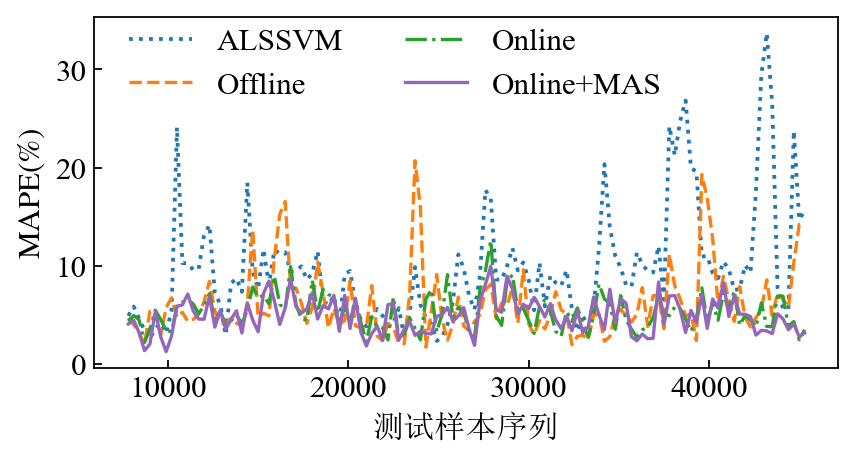

In [13]:
def get_error_window(y_pred1, y_true1):
    def mape(y_pred, y_true):
        loss = ((y_pred - y_true).abs() / (y_true.abs() + 1e-8))*100
        return loss

    def mae(y_pred, y_true):
        loss = (y_pred - y_true).abs()
        return loss

    mape = mape(y_pred1, y_true1)
    mae = mae(y_pred1, y_true1)
    # 绘制MAE，MAPE多步随时间变化情况,采用窗口求统计平均
    window_len = 300
    s, h = mape.shape
    mape_window = np.zeros((s//window_len, h))
    for i in range(s//window_len):
        mape_window[i, :] = mape[i*window_len:i*window_len+window_len,:].mean(0)
    print(mape_window.shape)
    return mape_window

mape_window1 = get_error_window(y_pred1, y_true1)
mape_window2 = get_error_window(y_pred2, y_true2)
mape_window3 = get_error_window(y_pred3, y_true3)
mape_window4 = get_error_window(y_pred4, y_true4)

# 绘图
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.ticker as ticker

font_size = 14
# create figure
config = {
"font.family":'serif',  
"font.size": font_size,    
"mathtext.fontset":'stix',
"xtick.direction":"in",
"ytick.direction":"in",
"font.family":"times new roman",
}
window_len = 300
# 画板设置
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
fig = plt.figure(dpi=160, figsize=(4*1.5, 2*1.5))
# 绘图曲线
train_st = 0
train_ed = train_st + train_len
val_st = train_ed
val_ed = train_ed + val_len
test_st = val_ed
test_ed = y_pred1.shape[0]

train_st, train_ed, val_st, val_ed, test_st, test_ed = [int(i/window_len) for i in [train_st, train_ed, val_st, val_ed, test_st, test_ed]]

h = 6 # 预测步数
ax = fig.add_subplot(111)

ax.plot(np.arange(test_st,test_ed)*window_len, mape_window1[test_st:test_ed,h], color=color_list[1], linewidth=1.7, linestyle=':')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window2[test_st:test_ed,h], color=color_list[2], linewidth=1.5, linestyle='--')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window3[test_st:test_ed,h], color=color_list[3], linewidth=1.5, linestyle='-.')
ax.plot(np.arange(test_st,test_ed)*window_len, mape_window4[test_st:test_ed,h], color=color_list[5], linewidth=1.5, linestyle='-')
# ax.set_ylim([0,59])
# ax.set_title("H=1",fontsize=font_size)
ax.set_ylabel('$\mathrm{MAPE(\%)}$', fontfamily="SimSun", fontsize=font_size)
legend_font = {"family":"times new roman", "size":font_size}
plt.legend(['ALSSVM','Offline','Online','Online+MAS'],frameon=False, prop=legend_font, ncol=2,  bbox_to_anchor=(0.8, 1.05))
ax.set_xlabel('测试样本序列', fontfamily="SimSun", fontsize=font_size)
plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None, wspace=0.1, hspace=0.4)#wspace 子图横向间距， hspace 代表子图间的纵向距离，left 代表位于图像不同位置

### 预测曲线绘制

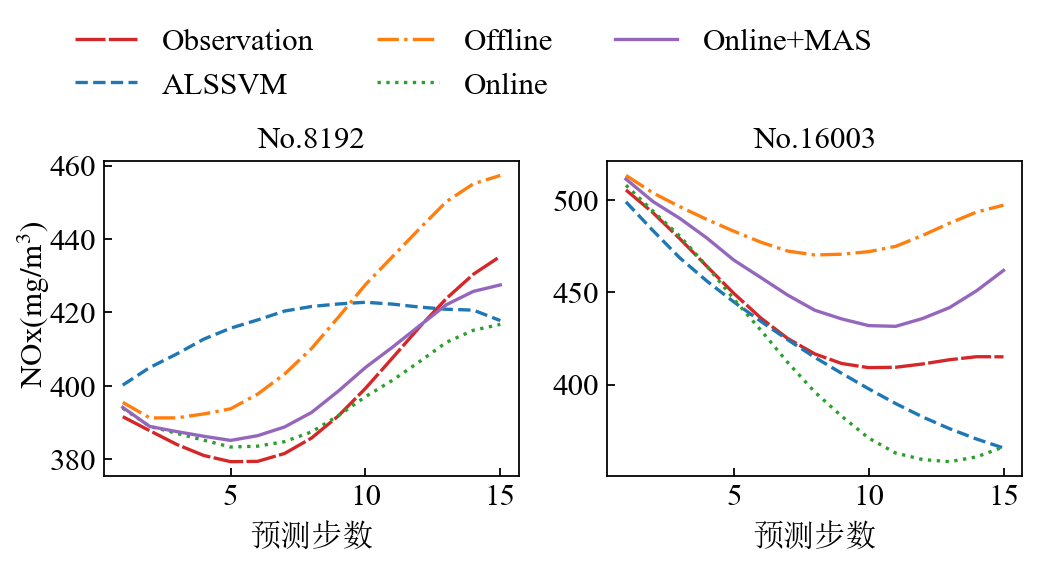

In [15]:
config = {
"font.family":'serif',  
"font.size": 14,       #14 放大是16
"mathtext.fontset":'stix',
"xtick.direction":"in",
"ytick.direction":"in",
#"font.serif": ['SimSun'],
"font.family":"times new roman",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
x = np.arange(1,16)
fig, ax1 = plt.subplots(1,2, figsize=(5*1.3,4/1.7*1.3), dpi=160)

point = 8192    # 10000  18000  32000   37000   40000  42100  42700 45400
ax1[0].plot(x, y_true1[point-1,:], color=color_list[4], linestyle=(0, (9, 1)), linewidth=1.5)
ax1[0].plot(x, y_pred1[point-1,:], color=color_list[1], linestyle='--', linewidth=1.5)
ax1[0].plot(x, y_pred2[point-1,:], color=color_list[2], linestyle='-.', linewidth=1.5)
ax1[0].plot(x, y_pred3[point-1,:], color=color_list[3], linestyle=':', linewidth=1.5)
ax1[0].plot(x, y_pred4[point-1,:], color=color_list[5], linestyle='-', linewidth=1.5)
ax1[0].set_title('No.{}'.format(point),fontsize=14 )
ax1[0].set_xlabel("预测步数",family= 'SimSun')

point = 16003  # 动态特性:8192  10804  16003   21022   28162  34992  36359  36370   45480  41302
ax1[1].plot(x, y_true1[point-1,:], color=color_list[4], linestyle=(0, (9, 1)), linewidth=1.5)
ax1[1].plot(x, y_pred1[point-1,:], color=color_list[1], linestyle='--', linewidth=1.5)
ax1[1].plot(x, y_pred2[point-1,:], color=color_list[2], linestyle='-.', linewidth=1.5)
ax1[1].plot(x, y_pred3[point-1,:], color=color_list[3], linestyle=':', linewidth=1.5)
ax1[1].plot(x, y_pred4[point-1,:], color=color_list[5], linestyle='-', linewidth=1.5)

ax1[1].set_title('No.{}'.format(point),fontsize=14)
#ax1[1,1].set_ylim([290,320])
ax1[1].set_xlabel("预测步数",family= 'SimSun')

legend_font = {"family":"times new roman","size":14}
fig.legend(['Observation', 'ALSSVM', 'Offline','Online','Online+MAS'],frameon=False,\
           prop=legend_font, ncol=3,  bbox_to_anchor=(0.85,1.19))

# fig.text(0.5, 0, "预测水平", ha='center',family= 'SimSun')
fig.text(0, 0.57, "NOx($\mathrm{mg/m^{3}}$)", va='center', rotation='vertical')   
plt.tight_layout()